## What is a Data Warehouse?
A datawarehouse is a system that *retrieves* and *consolidates*  data *periodically* from the source systems into a *dimensional* or *normalized data store*.It usually keeps years of *history* and is *queried* for *business intelligence* or other *analytical activites*.It is typically updated in *batches*.

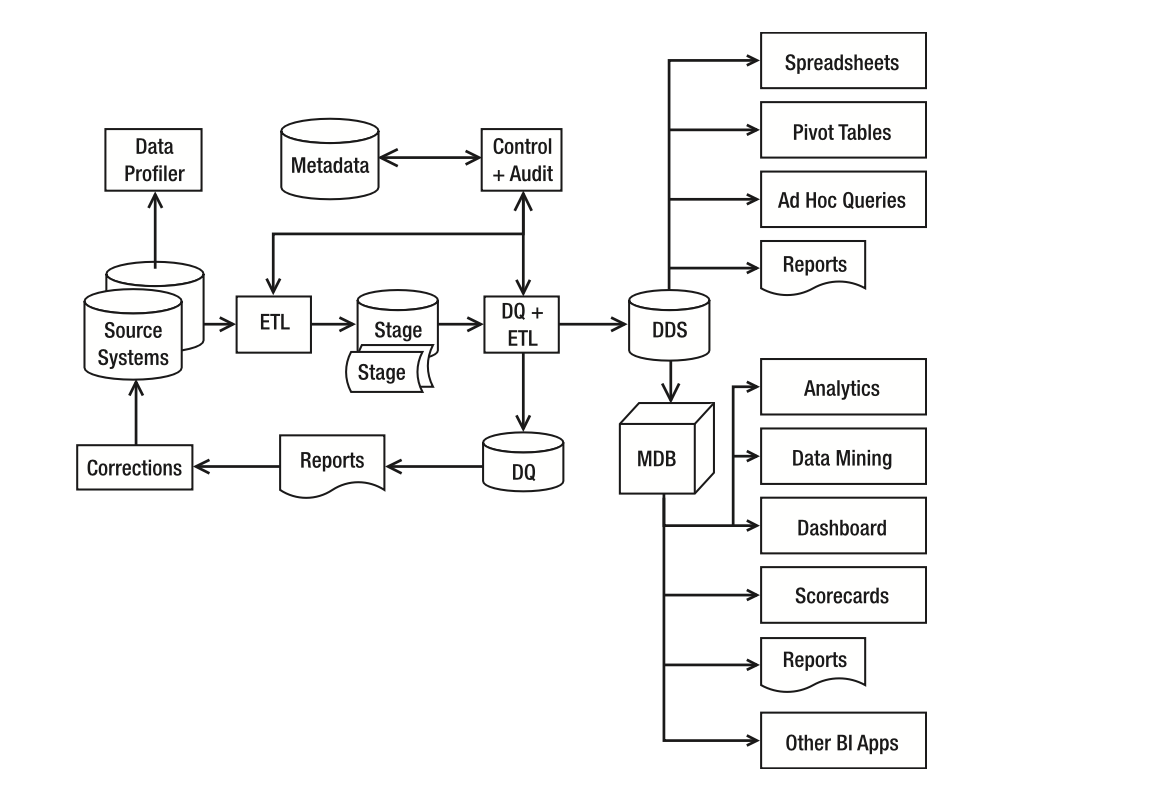



# New section

The *source systems* are the OLTP(Online Transaction Processing) systems that contain the data that you want to load into the data warehouse.OLTP is a system whose main purpose is to capture and store the business transactions.The source systems' is examined using a *data profiler* to understand the characteristics of the data. A data profiler is a tool that has the capability to analyze data, such as finding out how many rows are in each table, how many rows contain NULL values and so on.

The extract, transform, and load *(ETL)* system then brings data from various source systems into a *staging area*.ETL is a system that has the capability to connect to the source system, read the data, transform the data, and load it into a target system.(The target system doesn't have to be a data warehouse). The ETL system then integrates, transforms, and loads the data into a dimensional data store(DDS). A *DDS* is a dtabase that stores the data warehouse data in a different format than OLTP. The reason for getting the data from the source sytems into the DDS and then querying the DDS instead of querying the source system directly is that in a DDS the data is arranged in a dimensional format that is more suitable for analysis.

When the ETL systems loads the data into the DDS, the data quality rules do various data quality checks. Bad data is put into a data quality(DQ) database to be reported and then corrected in the source systems. Bad data can also be automatically corrected or tolerated if it is within a certain limit. The ETL sytem is managed and orchestrated by the control system, based on the sequence, rules, and logic stored in the metadata.The metabase is a database containing information about the data structure, the data meaning, the data usage, the data quality rules, and other information about the data.

The audit system logs the system operations and usage into a metadata database. The audit system is part of the ETL system that monitors the operational activities of the ETL processes and logs their operational statistics. It is used for understanding what happened during the ETL process.

Users use various front-end tools such as spreadsheet, pivot tables, reporting tools, and SQL query tools to retrieve and analyze the data in a DDS. Some applications operate on a multidimensional  database format. For these applications, the data in the DDS is loaded into a multidimensional databases(MDBs) ,which are also known as cubes.
A MDBs is a form of database where data is stored in cells and position of each cell is the values of the dimensions show when and where this event happened.

Tools such as analytics applications, data mining, scorecards, dashboards, multidimensional reporting tools, and other BI tools can retrieve data ineteratcively from multidimensional databases.

Not all datawarehouse systems have all the components pictured above. Even if a datawarehouse system does not have a quality mechanism, multidimensional database, any applications, a front-end application, a control system or audit system, metadat, or a stage you can still call it a data warehouse system.




### Retrives Data

The data retrieval is performed by a set of routines widely known as an ETL system, which is an abbreviation for extract, transform and load. The ETL system is a set of processes that retrieve data from the source systems, transform the data, and load it into a target system. The transformation can be used for changing the data to suit the format and criteria of the target system, for deriving new values to be loaded to the target system, or for validating the data from the source system.

Most ETL systems also have mechanisms to clean the data from the source system before putting it into the warehouse. Data cleansing is the process of identifying and correcting dirty data. This is implemented using a quality rules that define what dirty data is.If the rule determines the data is correct, then it is loaded into a warehouse. If the rule determines that the data is incorrect, then there are three options: it can be rejected, corrected, or allowed to be loaded into the warehouse.

There is another approach to ETL, the data is loaded into the data warehouse first in its raw format. The transformations, lookups and deduplication are performed inside the datawarehouse. This approach is usually implemented to take advantage of powerful data warehouse database engines such as massively parallel processing (MPP) systems.

### Consolidates Data

A datawarehouse consolidates many transactional systems. The key difference between a data warehouse and a front-office transactional system is that data in the data warehouse is integrated. This consolidation or integration should take into account the data availability (some data is available in several systems but not in others),time ranges(data in different systems has different validality periods),different definitions(the term total weekly revenue in one system may have different meaning from total weekly revenue in other systems), conversion(different systems may have different unit of measure or currency), and matching (merging data based on common identifiers between system).

### Periodically

The data retrieval and consolidation do not happen only once; they happen many times and usually at regular intervals, such as daily or a few times in a day.If the data retrieval happens only once, then the data will become obsolete, and after some time it will not be useful.

You can determine the peiod of retrieval based on the business requirements and the frequency of the data updates in the source systems. The data retrieval interval needs to be the same as the source systems' data update frequency.If the source system is updted only once a day, you need to set the retrieval to once a day.


### Dimensional Data Store

A data warehouse is a system that retrieves data from source systems and puts it into a
dimensional data store or a normalized data store. Yes, some data warehouses are in dimen-
sional format, but some data warehouses are in normalized format. Let’s go through both
formats and the differences between them.
A DDS is one or several databases containing a collection of dimensional data marts.
A dimensional data mart is a group of related fact tables and their corresponding dimension
tables containing the measurements of business events categorized by their dimensions.
A dimensional data store is denormalized, and the dimensions are conformed. Con-
formed dimensions mean either they are exactly the same dimension table or one is the
subset of the other. Dimension A is said to be a subset of dimension B when all columns of
dimension A exist in dimension B and all rows of dimension A exist in dimension B.
A dimensional data store can be implemented physically in the form of several different
schemas. Examples of dimensional data store schemas are a star schema,
a snowflake schema, and a galaxy schema. In a star schema, a dimension does not have a sub-
table (a subdimension). In a snowflake schema, a dimension can have a subdimension. The
purpose of having a subdimension is to minimize redundant data. A galaxy schema is also
known as a fact constellation schema. In a galaxy schema, you have two or more related fact
tables surrounded by common dimensions. The benefit of having a star schema is that it is sim-
pler than snowflake and galaxy schemas, making it easier for the ETL processes to load the data
into DDS. The benefit of a snowflake schema is that some analytics applications work better
with a snowflake schema compared to a star schema or galaxy schema. The other benefit of a
snowflake schema is less data redundancy, so less disk space is required. The benefit of galaxy
schema is the ability to model the business events more accurately by using several fact tables.

### Normalized Data Store

Other types of data warehouses put the data not in a dimensional data store but in a normal-
ized data store. A normalized data store is one or more relational databases with little or no
data redundancy. A relational database is a database that consists of entity tables with parent-
child relationships between them.
Normalization is a process of removing data redundancy by implementing normalization
rules. There are five degrees of normal forms, from the first normal form to the fifth normal
form. A normalized data store is usually in third normal form or higher, such as fourth or fifth
normal form. A dimensional data store is a better format to store data in the warehouse for the purpose
of querying and analyzing data than a normalized data store. This is because it is simpler (one
level deep in all directions in star schema) and gives better query performance. A normalized
data store is a better format to integrate data from various source systems, especially in third
normal form and higher. This is because there is only one place to update without data redundancy like in a dimensional data store.
The normalized data store is usually used for an enterprise data warehouse; from there
the data is then loaded into dimensional data stores for query and analysis purposes.

Some applications run on DDS, that is a relational database that consists of tables withr row and columns. Some applications run on a multidimensional database that consists of cubes with cells and dimensions.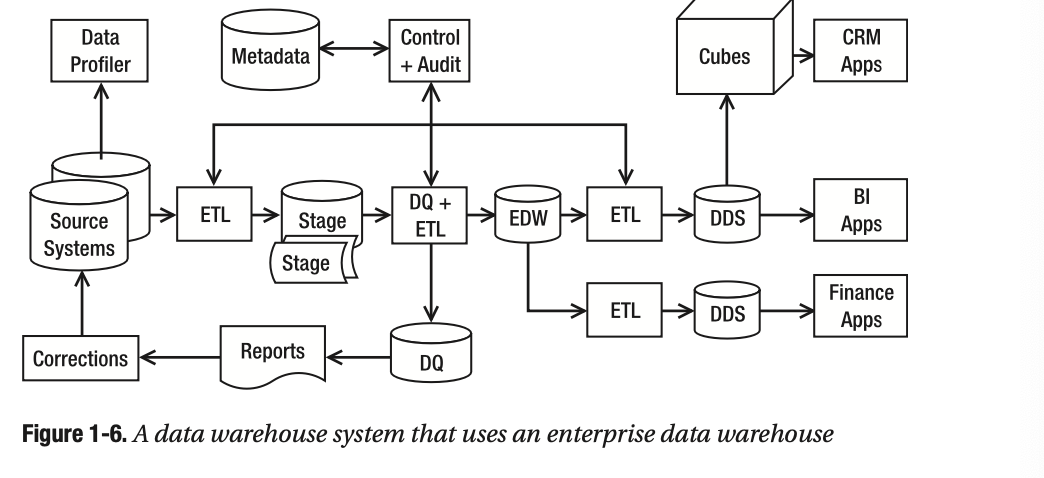

### History
One of the key differences between a transactional system and a data warehouse system is the capbility and capacity to store history. Most transactional systems store some history, but data warehouse systems store very long history.Therefore, it is important for a datawarehpuse system to be able to update a huge table bit by bit, query it bit by bit,and back it up bit by bit. Database features such as table partitioning and parallel query would be useful for a data warehouse system. Table partitioning is a method to split a table by rows into several parts and store each part in a differenct file to increase data loading and query performance.Parellel query is a process where a single query is split into smaller parts and each part is given to an independent query-processing module.The query result from each module is then combined and sent back to the front-end application.

Most transaction systems store histroy of the transactions but not history of the master data such as products, customers, branches, and vehicless. Most transaction systems update the old description with the new one;they do not store the old descriptions.

In a data warehouse, on the other hand, storing the history of the master data is one of the key features. This is known as a slowly changing dimension(SCD). A SCD is a technique used in dimesional modelling for preserving historical information about dimensional data. In SCD type 2, you keep the historical information in rows; while in SCD type 3, you keep the historical information in columns.In SCD type 1 you dont keep the historical information.

Also, a data warehouse stores periodic snapshot of operational source systems. A snapshot is a copy of one or more master tables taken ata certain time.For example, the banking industry takes snapshots of customer account tables everyday. The data warehouse applicatiions then compare the daily snapshots to analyze customer churns, account balances , and unusual conditions. One needs to be careful using snapshots it consumes a lot of storage.

### Query

Querying is the process of getting data from a data store, which satisfies certain criteria. A data warehouse is built to be queried. Users are not allowed to update the data warehouse. Users can only query the data warehouse. Only the ETL system is allowed to update the data warehouse.This is one of the key differences between a data warehosue and a transaction system.

### Business Intelligence

Business Intelligence is a collection of activities to understand business situations by performing various types of analysis on the company data as well as on external data from third parties to help make strategic,tactitcal, and operational business decisions and take necssary actions for improving business performance.This includes gathering, analyzing, understanding, and managing data about operation performance, competition, regulatory compliance, and quality controls.

Business intelligence activities can be group into three categories;

1. Reporting, such as key performance indicators, global sales figures by business unit and service codes, worldwide customer accounts, consolidated delivery status, and resource utilization rates across different branches in many countries.

2. OLAP, such as aggregation, drill down, slice and dice, and drill across

3. Data mining, such as data characteristics, data discrimination, association analysis, classfification, clustering, prediction, trend analysis, deviation analysis,and similarity analysis

### Reporting
In a data warehousing context, a report is a program that retrieves data from the data warehouse and presents it to the users on the screen or on a paper.Users can also subscribe to these reports so that they can be sent to the users automatically by e-mail at certain times.

### Online Analytical Processing (OLAP)

OLAP is the activity of interactively analyzing business transaction data stored in the dimensional data warehouse to make tactical and strategic business decisions. Typical people who do OLAP work are analysts.Typical functionality includes aggregating(totalling), drilling down(getting the details), and slicing and dicing (cutting the cube and summing the values in the cells).This can be delivered using ROLAP or MOLAP.

### Data Mining

This is a process to explore data to find patterns and relationships that describe the data and to predict the unknown or future values of the data. The key value in data mining is the ability to understand why some things happened in the past and to predict what will happen in the future.when used to eplain past situation it is called *descriptive analysis* but when used to predict future it is called *predictive analysis*.

In business intelligence, popular applications of data mining are for fraud detection
(credit card industry), forecasting and budgeting (finance), developing cellular/mobile pack-
ages by analyzing call patterns (telecommunication industry), market basket analysis (retail
industry), customer risk profiling (insurance industry), usage monitoring (energy and utili-
ties), and machine service times (manufacturing industry).

Data mining system can work with various types of data formats: various types of databases(relational databases , hiereachical databases, dimensional databses, object-oriented databsaes and multidimensional databases), files(spreadsheet files, XML files, and structured text files), unstructured or semistructured data(documents, e-mails, and XML files), stream data(plant measurements , temperatures and pressures, network traffic, and telecommunication traffic),multimedia files (audio, video, images, speeches), web sites/pages, web logs.

Of these various types of data, data mining applications work best with a data warehouse because the data is already cleaned,it is structured, it has metadata that describes the data, it is integrated, it is nonvolatile(i.e it is static), and most important it is usually arranged in dimensional format that is suitable for various data mining tasks such as classification, exploration, description, and prediction.

To implement data mining in SQL Server Analysis Services(SSAS), you build a mining model using the data from relational sources or from OLAP cubes containing certain mining algorithms such as decision trees and clustering.

### Master Data Management(MDM)

To understand which entities are the transaction data and which entities are the master data, you need to model the business process. The business event is the transaction data. Master data consists of the entities that describes the business event. Master data consists of the answers of who, what, and where questions about the business transaction.

Examples of master data are the supplier, branch,office, employee, citizen,taxpayer,assets,inventory,store,salespeople,property,equipment,time,product,tools,roads,,customer, server, switch, account, service code, destination, contract, plants,machines, vehicles and so on.

An MDM system retrieves the master data from OLTP systems. The MDM system consolidates the master data and processes the data through predefined data quality rules. The master data is then uploaded to a master data store.Any changes on master data in OLTP systems are sent to the MDM system, and the master data store is updated to reflect those changes.The MDM system then publishes the master data to other systems.

### Customer Data Integration
Customer data Integration(CDI) is the MDM for customer data. CDI is the process of retrieving, cleaning, storing, maintaining, and distributing customer data. A CDI system retrieves customer data from OLTP systems, cleans it, stores it in a customer master data store, maintains the customer data, keeps it up-to-date, and distributes the customer data to other systems.
A CDI system enables you to have cleaner, single, reliable vesion of customer data that other applications in the enterprise can use.

### Future Trends in Data Warehousing

#### Unstructured Data

Data that is in the database is structured; it is organized in rows and columns. I have talked in great length in previous sections about data warehousing using structured data; that is, the source system is a database. It can be a relational database(table, rows and columns), and it may be object-oriented database(classes and types) or hierarchical database(a tree-like structure).However, they all have data structure.

Unstructured data, on the other hand, does not have a data structure such as rows and columns, a tree-like structure, or classes and types. Examples of unstructured data are documents, images(photos, diagrams and pictures), audio( songs, speeches, and sounds), video (films, animations), streaming data, text, e-mails, and Internet websites.How do you store unstructured data in the data warehouse? And, after you store it, how do you get the information that you need out of this data?Well, the answer to the first question is for each unstructured data item you define the attributes and then organize these items according to the attributes. You can store the unstructured data items in a relational database as a binary object column.Or you can store it in the file systems and just store the pointer to the file in the database.

##### Search
To get the information out of unstructured data, especially text data such as documents, e-mails, and web pages, you do a search.Like on the Internet, the serch engine has already crawled the data warehouse and indexed the unstrcutured data.